Fitting the SIR Model:

In [74]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [115]:
import pandas as pd

d = {'day': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
     'sus': [763, 760, 755, 737, 671, 482, 312, 224, 134,  75,  53,  53,  53,  53, 53],
     'in_bed': [0,3, 7, 22, 78, 233, 300, 256, 233, 189, 128, 72, 33, 11, 6],}

influenza = pd.DataFrame(d)
influenza

,day,sus,in_bed
0,0,763,0
1,1,760,3
2,2,755,7
3,3,737,22
4,4,671,78
5,5,482,233
6,6,312,300
7,7,224,256
8,8,134,233
9,9,75,189


In [100]:
### Here's Where I'm Cheating, this doesnt work...

S = 763
S_list = []

for I in influenza['in_bed']:
    S = round(S - .00218*S*I)
    S_list = S_list + [S]

In [109]:
### Here's Where I'm Cheating, this may work a bit better

R_list = [0]

for I in influenza['in_bed']:
    R_list = R_list + [round(R_list[-1] + .44*I)]

763 - np.array(R_list) - np.array([3, 7, 22, 78, 233, 300, 256, 233, 189, 128, 72, 33, 11, 6,5])

ValueError: operands could not be broadcast together with shapes (16,) (15,) 

In [110]:
np.array(R_list)

array([  0,   0,   1,   4,  14,  48, 151, 283, 396, 499, 582, 638, 670,
       685, 690, 693])

Text(0, 0.5, 'Infected')

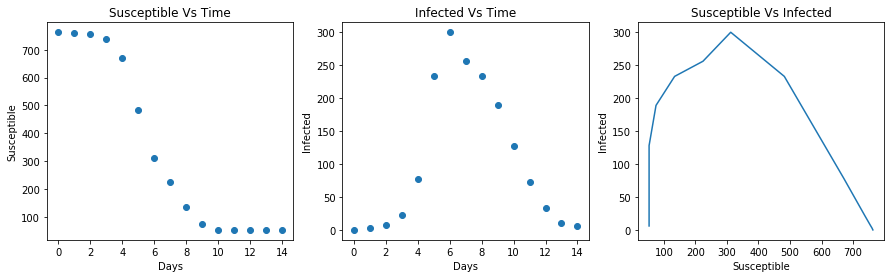

In [116]:
f, axes = plt.subplots(1,3, figsize=[15,4])

axes[0].plot('day', 'sus', 'o', data = influenza)
axes[0].set_title('Susceptible Vs Time')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Susceptible')

axes[1].plot(influenza['day'], influenza['in_bed'],'o')
axes[1].set_title('Infected Vs Time')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Infected')

axes[2].plot(influenza['sus'], influenza['in_bed'])
axes[2].set_title('Susceptible Vs Infected')
axes[2].set_xlabel('Susceptible')
axes[2].set_ylabel('Infected')

In [137]:
influenza

,day,sus,in_bed
0,0,763,0
1,1,760,3
2,2,755,7
3,3,737,22
4,4,671,78
5,5,482,233
6,6,312,300
7,7,224,256
8,8,134,233
9,9,75,189


In this case we know the recovery rate: It averages about 2.25 days. That means that $\gamma =  1/2.25 = .44$. Next, we need to estimate $\beta$. There are a few ways we could do this:

$$
0 = I' = \beta IS - \gamma I
$$

implies that $I$ should  have a critical point at $S = \gamma/\beta$. We find that $I$ is at a max when $(S,I) = (312,300)$, so 

$$
312 = \gamma/\beta\,\hspace{3em} \beta = .44/312 = 0.0014
$$

Lets see what we get:

In [118]:
.44/312

0.0014102564102564104

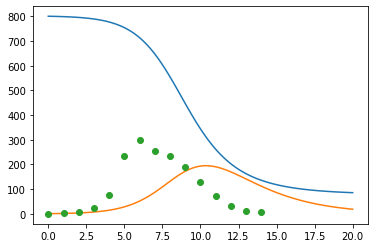

In [125]:
def model(Y, t, beta, gamma):
    S,I = Y
    return [-beta*S*I, beta*S*I - gamma*I]

t = np.linspace(0,20,100)

sol = odeint(model, [800,1], t, (.44/312,.44))

plt.plot(t, sol[:,0])
plt.plot(t, sol[:,1])

plt.plot(influenza['day'],influenza['in_bed'],'o')

This doesn't look quite correct. But we notice  as well that the 6'th day is kind of an outlier, it looks a little weird. The "smooth" maximum may actually fall more between the 7'th day. This would then yield

$$
\beta = .44/224
$$

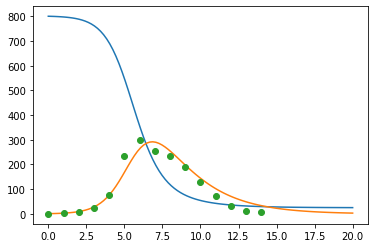

In [126]:
def model(Y, t, beta, gamma):
    S,I = Y
    return [-beta*S*I, beta*S*I - gamma*I]

t = np.linspace(0,20,100)

sol = odeint(model, [800,1], t, (.44/224,.44))

plt.plot(t, sol[:,0])
plt.plot(t, sol[:,1])

plt.plot(influenza['day'],influenza['in_bed'],'o')

This is a reasonable looking result.

### Inflection Point Calculation:

Assume now that we only has a small portion of the data:

Text(0, 0.5, 'Infected')

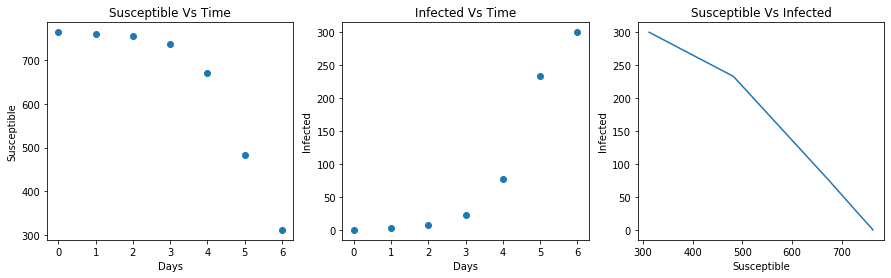

In [140]:
f, axes = plt.subplots(1,3, figsize=[15,4])

influenza_h = influenza.head(7)

axes[0].plot('day', 'sus', 'o', data = influenza_h)
axes[0].set_title('Susceptible Vs Time')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Susceptible')

axes[1].plot(influenza_h['day'], influenza_h['in_bed'],'o')
axes[1].set_title('Infected Vs Time')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Infected')

axes[2].plot(influenza_h['sus'], influenza_h['in_bed'])
axes[2].set_title('Susceptible Vs Infected')
axes[2].set_xlabel('Susceptible')
axes[2].set_ylabel('Infected')

This squares with another interpretation of the parameter $\beta$:

$$
0 = S'' = -\beta S' I - \beta I' S = -\beta(- \beta SI^2 + \beta S^2 I - \gamma SI)
$$

factoring out a copy of $IS$ we have

$$
0 = \beta I - \beta S  + \gamma
$$

or

$$
S = I + \gamma/\beta
$$

We can use (S,I) = (482, 233)

$$
482 = 233 + .44/\beta
$$

and solve for

$$
\beta = \frac{\gamma}{.44/(S-I)}
$$

This is actually a pretty reasonable estimate and gives a prediction for the results:

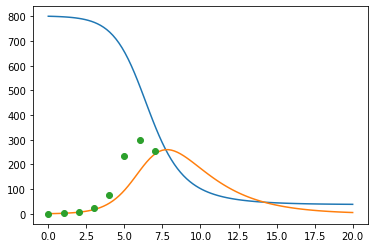

In [136]:
def model(Y, t, beta, gamma):
    S,I = Y
    return [-beta*S*I, beta*S*I - gamma*I]

t = np.linspace(0,20,100)

sol = odeint(model, [800,1], t, (.44/250,.44))

plt.plot(t, sol[:,0])
plt.plot(t, sol[:,1])

plt.plot(influenza_h['day'],influenza_h['in_bed'],'o')

### Linear Portion Estimate:

What if we have even less data?

Text(0, 0.5, 'Infected')

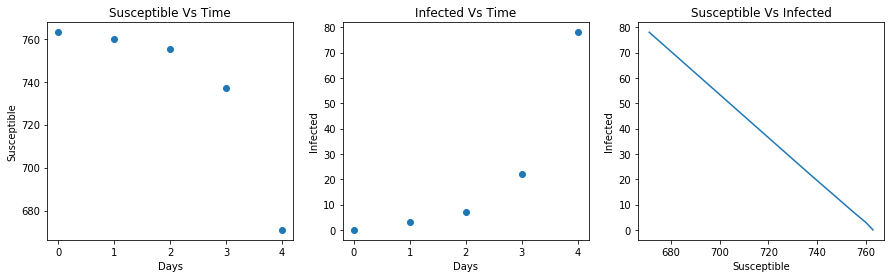

In [141]:
f, axes = plt.subplots(1,3, figsize=[15,4])

influenza_h = influenza.head(5)

axes[0].plot('day', 'sus', 'o', data = influenza_h)
axes[0].set_title('Susceptible Vs Time')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Susceptible')

axes[1].plot(influenza_h['day'], influenza_h['in_bed'],'o')
axes[1].set_title('Infected Vs Time')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Infected')

axes[2].plot(influenza_h['sus'], influenza_h['in_bed'])
axes[2].set_title('Susceptible Vs Infected')
axes[2].set_xlabel('Susceptible')
axes[2].set_ylabel('Infected')

Notice that the S vs I curve is linear. We might be able to leverage that! Lets translate that in terms of derivatives: If $\gamma = (S,I)$ is linear, than $I = aS + b$ so 

$$
a = \frac{dI}{dS}  = \frac{\frac{dI}{dt}}{\frac{dS}{dt}} = \frac{\beta S I - \gamma I}{-\beta SI} = -\frac{\beta  S - \gamma}{\beta S} = \frac{\gamma}{\beta S} - 1
$$

So

$$
a = \frac{0 - 7}{763 - 755} = -0.875
$$

and

$$
\beta = \frac{\gamma}{S(a + 1)} = \frac{3}{763} = 0.003931
$$

Should we trust this number? Probably not, an notice that the susceptible number is actually suspect as well. Really, it's entirely possible that we have a bunch of people walking around who are still sick. In this case we should do everything we possibly can in terms of the infected curve. 

In [153]:
-78/(763-671) + 1

0.15217391304347827

In [161]:
3/763

0.003931847968545216

In [151]:
.44/(763 * 0.15)

0.0038444735692442114

In [142]:
influenza_h

,day,sus,in_bed
0,0,763,0
1,1,760,3
2,2,755,7
3,3,737,22
4,4,671,78


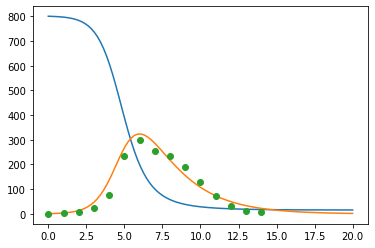

In [162]:
def model(Y, t, beta, gamma):
    S,I = Y
    return [-beta*S*I, beta*S*I - gamma*I]

t = np.linspace(0,20,100)

sol = odeint(model, [800,1], t, (0.0022,.44))

plt.plot(t, sol[:,0])
plt.plot(t, sol[:,1])

plt.plot(influenza['day'],influenza['in_bed'],'o')

### Preditor Prey Model:

## Snowshoe Hair and Lynx?

<img src = "Snowshoe Hare vs Lynx.png">
<img src = "Week6PP4.png">

Recall:

\begin{align*}
X' &= b X - c_1 XY
\\
Y' &= c_2 XY - d Y
\end{align*}

There dataset is one of the longest term ecology datasets known. It was taken as a bit of proof of the Lotka-Voltera equations. There is a big problem with it however: The predation goes backwards! Remember that we should have a counter clockwise spiral where prey become abundant and then predators. Here, the predators often become abundant before the prey. This would totally invalidate the equations. However, since there are parts

Okay, no matter, lets assume that this still works. How do we find the parameters? 

Recall that at the fixed point $(d/c_1,b/c_2)$ the eigenvalues are given by 

$$
\lambda = \pm i\sqrt {bd}
$$

so the period is

$$
T = 2\pi/\sqrt{bd}
$$


Frequency 

$$
\omega = \sqrt{bd}
$$

We can also relate $b$ and $d$ to the approximate growth when $Y$ is small or $X$ is large respectively. For the Lynx, it appears the population halves every year when  in unrestricted death, so we guess

$$
d = 0.6931
$$

For the rabbits, we are seeing roughly jumps of 1000 to 5000 in a year, 500 to 10000, so we might estimate 

$$
b = ln(10) = 2.30
$$

When the hare is at its peak, the average number of Lynx pelts is about 40,000, so 

$$
2.30 = 40,000 * c_1
$$

Similarly for the linx peaks we're at about 7,500, so

$$
0.6931 = 7,500 * c_2
$$

In [243]:
2*np.pi/np.sqrt(2.30*0.6931)

4.976431161879894

(array([0.00000000e+00, 4.00040004e-03, 8.00080008e-03, ...,
        3.99919992e+01, 3.99959996e+01, 4.00000000e+01]),
 array([40000.        , 40018.3162834 , 40036.30175096, ...,
         8553.20605191,  8547.93038793,  8542.67531362]))

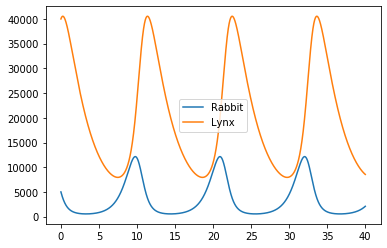

In [254]:
def model(Y, t, b, d, c1, c2):
    X1,X2 = Y
    return [b*X1 - c1*X1*X2, c2*X1*X2 -d*X2]

t = np.linspace(0,40,10000)

sol = odeint(model, [5000,40000], t, (2.30/2,0.6931/2, 5.75e-05,9.241e-05))

plt.plot(t, sol[:,0], label="Rabbit")
plt.plot(t, sol[:,1], label="Lynx")

plt.legend()

t, sol[:,1]

Qualatatively, we see a lot of the features we wuld like. Of course we still have the same problem from before: There are places where this does not match the data. 

In [77]:
.44/200

0.0022

In [77]:
.44/200

0.0022

## Combining models, larger systems:

## Competing Species With Predator Prey

Set up equations, and show by example that the addition of a predator species can actually stablize prey populations:

\begin{align}
X' &= X(\beta_1  -c_1Y - d_1 X - e_1Z)
\\
Y' &= Y(\beta_2 - c_2X - d_2 Y - e_2Z)
\\
Z' &= Z(-\delta + r_1 X + r_2 Y)
\end{align}

Note, there are $2^3 = 8$ equalibrium points, exactly one of which has no nonzero species: (Draw Picture)

Three open questions:

* Under what conditions is $X_*$ in the positive coordinate cone $X_i>0$ for all $i$?
* Under what conditions is $X^*$ a stable point?
* What kinds of orbits are allowed (infact, the answer here id complicated: many kinds are, including chaotic attractors).

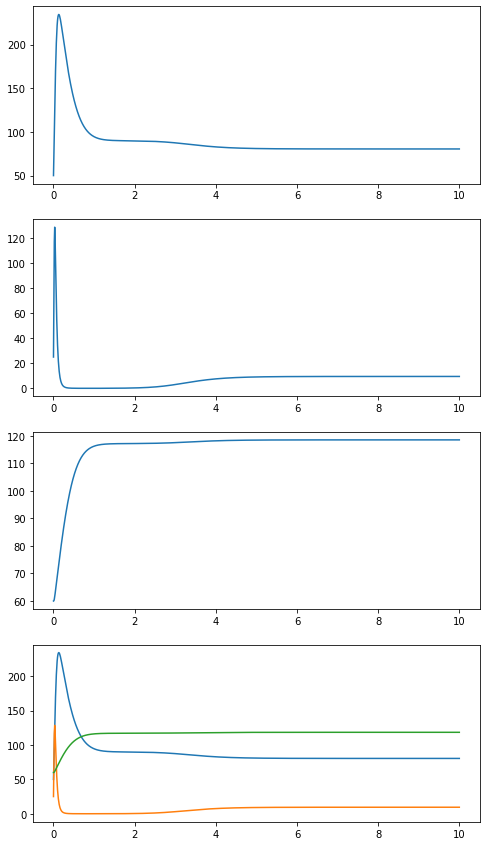

In [311]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

b1 = 100
b2 = 300
c1 = .1
c2 = .7
d1 = .2
d2 = .7

pd = .9
p1 = .01
p2 = .01
r1 = .7
r2 = 2

def model(X,t,ags):
    [b1,b2,c1,c2,d1,d1,pd,p1,p2,r1,r2] = ags
    [x,y,z] = X
    
    dXdt = [x*(b1 - d1*x - c1*y - r1*z),y*(b2-c2*x-d2*y-r2*z),z*(-pd+p1*x+p2*y)]
    return dXdt

X0 = [50,25,60]

t = np.linspace(0,10,1000)

ags = [b1,b2,c1,c2,d1,d1,pd,p1,p2,r1,r2]

sol = odeint(model, X0, t, args=(ags,))

f, axes = plt.subplots(4, figsize=(8, 15))

for i in range(3):
    axes[i].plot(t,sol[:,i])
    axes[3].plot(t,sol[:,i])

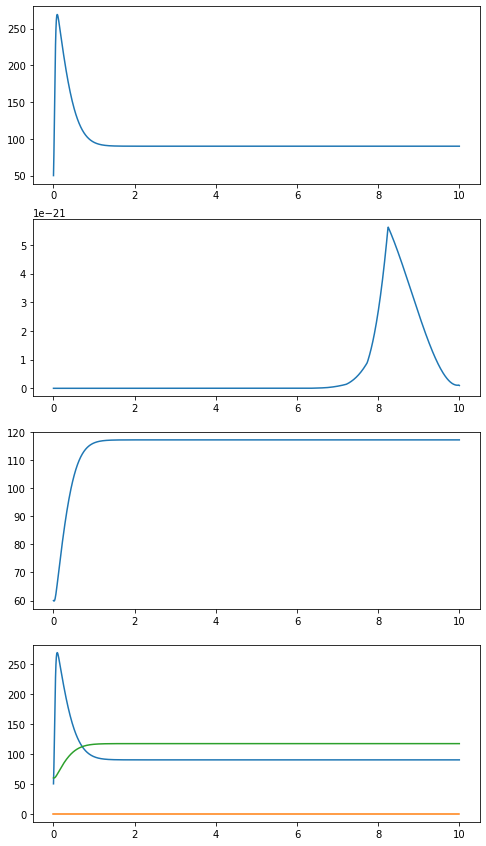

In [266]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

b1 = 100
b2 = 300
c1 = .1
c2 = .7
d1 = .2
d2 = .7

pd = .9
p1 = .01
p2 = .01
r1 = .7
r2 = 2

def model(X,t,ags):
    [b1,b2,c1,c2,d1,d1,pd,p1,p2,r1,r2] = ags
    [x,y,z] = X
    
    dXdt = [x*(b1 - d1*x - c1*y - r1*z),y*(b2-c2*x-d2*y-r2*z),z*(-pd+p1*x+p2*y)]
    return dXdt

X0 = [50,25,60]

t = np.linspace(0,10,1000)

ags = [b1,b2,c1,c2,d1,d1,pd,p1,p2,r1,r2]

sol = odeint(model, X0, t, args=(ags,))

f, axes = plt.subplots(4, figsize=(8, 15))

for i in range(3):
    axes[i].plot(t,sol[:,i])
    axes[3].plot(t,sol[:,i])

## Large Systems of Equations:

Recall how in the homework you used linear algebra to write the heating for a house in a simple form using linear equations. The Lotka-Voltera equations can be generalized as well:

\begin{align}
X' &= X(\beta_1  -c_1Y - d_1 X - e_1Z) 
\\
Y' &= Y(\beta_2 - c_2X - d_2 Y - e_2Z)
\\
Z' &= Z(-\delta + r_1 X + r_2 Y)
\end{align}

can be written

$$
\vec{X}' = D_{\vec{X}} (A \vec{X} - R)
$$

where $A$ is the predation matrix and $D$ is the diagonal matrix with entires $\beta_i$ and $-\delta$. Concretely, 

$$
A = [a_{ij}] = \left[
\begin{matrix}
-d_1&-c_1&-e_1
\\
-c_2&-d_2&-e_2
\\
r_1& r_2 &0
\end{matrix}
\right]\,,\hspace{4em}
R = [r_{ii}] = \left[
\begin{matrix}
\beta_1\\
\beta_2
\\
-\delta
\end{matrix}
\right]
\,,\hspace{4em}
D_X = [X_{ii}] = \left[
\begin{matrix}
X\\
&Y
\\
&&Z
\end{matrix}
\right]
$$

where $a_{ij}$ is the interaction benefit or penalty between populations $i$ and $j$. $R$ is the unrestricted growth or decay rate, and $D_{X}$ is the diagonal matrix whose entries are X. We know enough about these equations to analyze them  at this point, and we can even give a partial formulat for the equilibirum solutions:

$$
0 = \vec{X}' = D_{\vec{X}} (A \vec{X} - R)
$$

can be solved for the $2^N$ equilibiria. For each variable $X_i$, we have solutions when $X_i = 0$ and when $X_i \neq 0$. Assume $X_{i_1},\ldots, X_{i_{j}}$ are zero, and let $A_{i_1,\ldots, i_j}$ be the minor that does not include columns or rows $i_1,\ldots, i_j$. Then the equilibrium can be found by solving

$$
 \vec{X}_{i_1,\ldots, i_j} = A^{-1}_{i_1,\ldots, i_j}R_{i_1,\ldots, i_j}
$$

There is at most one equilibrium solution where all populations are nonzero, and that is the solution to 

$$
\vec{X} = A^{-1} R
$$

if this solution lies in the $X_i\geq 0$ portion of the phase space then we have the potential to have a stable equilibirum popultion. 

**Question:** What would we expect instead?

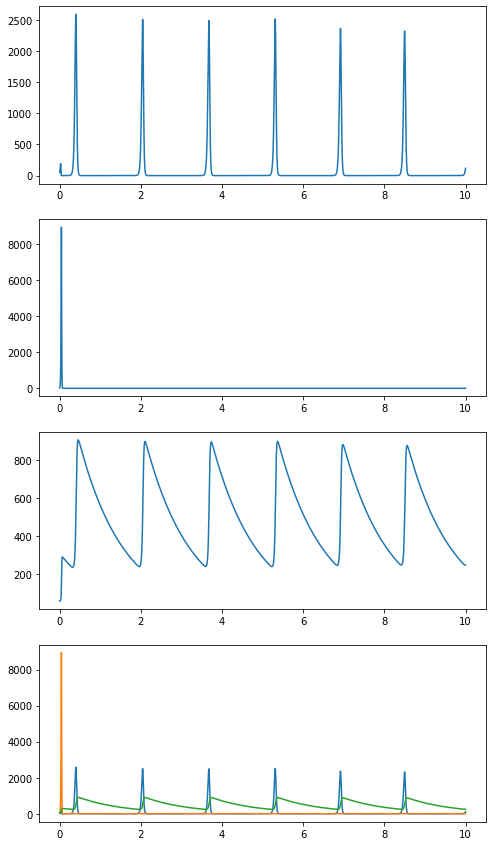

In [279]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

b1 = 100
b2 = 300
c1 = .1
c2 = .1
d1 = 0
d2 = 0

pd = .9
p1 = .01
p2 = .01
r1 = .2
r2 = 2

def model(X,t,ags):
    [b1,b2,c1,c2,d1,d2,pd,p1,p2,r1,r2] = ags
    [x,y,z] = X
    
    dXdt = [x*(b1 - d1*x - c1*y - r1*z),y*(b2-c2*x-d2*y-r2*z),z*(-pd+p1*x+p2*y)]
    return dXdt

X0 = [50,25,60]

#X0 = [50,0,60]

t = np.linspace(0,10,10000)

ags = [b1,b2,c1,c2,d1,d1,pd,p1,p2,r1,r2]

sol = odeint(model, X0, t, args=(ags,))

f, axes = plt.subplots(4, figsize=(8, 15))

for i in range(3):
    axes[i].plot(t,sol[:,i])
    axes[3].plot(t,sol[:,i])

## Example:

Multiple SIR populations:

Imagine we have multiple communities that we are trying to model with SIR. For example, a city population and a hospitol.

\begin{align}
S_1' &= -\beta_1 S_1I_1\\
I_1' &= \beta_1 S_1I_1  - \gamma_1 I_1 - \delta I_1
\\\\
S_2' &= -\beta_2 S_2I_2\\
I_2' &= \beta_2 S_2I_2  - \gamma_2 I_2 + \delta I_1
\end{align}

Lets assume here that $S_1>>S_2$ and that we want to model the idea of "flattening the curve". We assume that $\gamma_1 = \gamma_2$, but that $\beta_2 = .1*\beta_1$ since hospitol staff are much better at care measures.

#### Question:

Given $\gamma_1 = \gamma_2 = 1/14$ a an expected 2 days until someone is found, what must $\beta$ be to ensure no more than 1000 beds are used?

What happens to the hospitol staff? Do they manage to stave off infection?

What if $\delta$ changes?

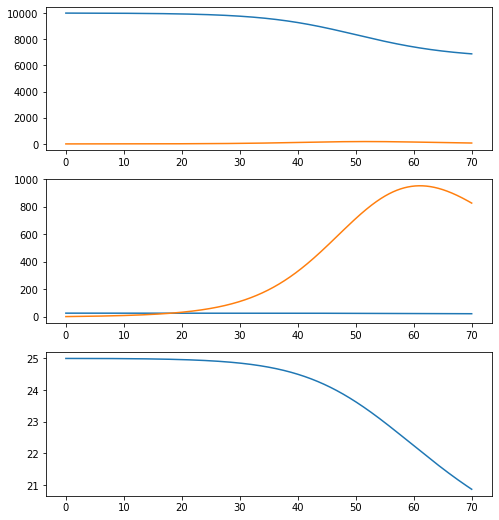

In [308]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

def model(X,t,ags):
    beta1, beta2, gamma, delta = ags
    [S1,I1,S2,I2] = X
    
    dXdt = [-beta1*S1*I1, beta1*S1*I1 - gamma*I1 - delta*I1,
            -beta2*S2*I2, beta2*S2*I2 - gamma*I2 + delta*I1]
    return dXdt

X0 = [10000,1,25,0]

#X0 = [50,0,60]

t = np.linspace(0,70,10000)

beta = .00007

ags = [beta,.1*beta, 1/14, 1/2]

sol = odeint(model, X0, t, args=(ags,))

f, axes = plt.subplots(3, figsize=(8, 9))

for i in range(2):
    axes[i].plot(t,sol[:,2*i])
    axes[i].plot(t,sol[:,2*i+1])
    
axes[2].plot(t,sol[:,2])

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
xls = pd.ExcelFile("CSGo Data.xlsx")
df1 = pd.read_excel(xls, 'Plunkbat')
df2 = pd.read_excel(xls, 'CSGO')
df3 = pd.read_excel(xls, 'TF')

In [17]:
df1

,Month,Peak,Gain,% Gain,Min Daily Peak,Avg Daily Peak,Twitch Peak
0,2020-07-01,489778,-57004,-0.104,389836,441937,59445
1,2020-06-01,546782,-8039,-0.014,448053,486054,80584
2,2020-05-01,554821,-370878,-0.401,471867,510694,71787
3,2020-04-01,925699,329186,0.552,456459,534661,69626
4,2020-03-01,596513,-17671,-0.029,471235,527860,72101
5,2020-02-01,614184,-37572,-0.058,534040,572460,70531
6,2020-01-01,651756,-41967,-0.06,339070,537569,66180
7,2019-12-01,693723,-6858,-0.01,565210,623165,79445
8,2019-11-01,700581,61018,0.095,525943,624622,120126
9,2019-10-01,639563,-24649,-0.037,514219,570813,71532


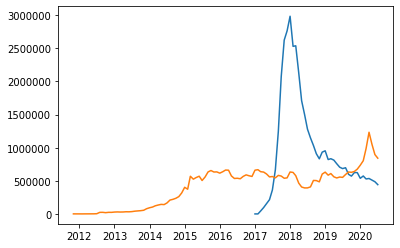

In [31]:
plt.plot(df1["Month"], df1['Avg Daily Peak'])
plt.plot(df2["Month"], df2['Avg Daily Peak'])
#plt.plot(df3["Month"], df3['Avg Daily Peak'])

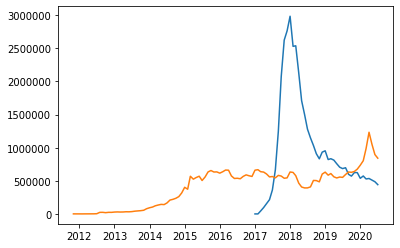

In [34]:
plt.plot(df1["Month"], df1['Avg Daily Peak'])
plt.plot(df2["Month"], df2['Avg Daily Peak'])

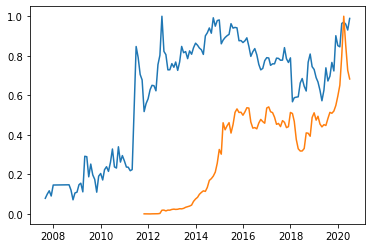

In [29]:
plt.plot(df3["Month"], df3['Avg Daily Peak']/df3['Avg Daily Peak'].max())
plt.plot(df2["Month"], df2['Avg Daily Peak']/df2['Avg Daily Peak'].max())

In [27]:
df2['Avg Daily Peak'].max()

1232499